In [1]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
filenames = ['train.csv', 'event_type.csv', 'log_feature.csv', 'resource_type.csv', 'severity_type.csv']
dataframes = [pd.read_csv(f) for f in filenames]

In [3]:
from functools import reduce
df = reduce(lambda df1,df2: pd.merge(df1, df2, on='id'), dataframes)

In [4]:
df

,id,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
0,14121,location 118,1,event_type 34,feature 312,19,resource_type 2,severity_type 2
1,14121,location 118,1,event_type 34,feature 232,19,resource_type 2,severity_type 2
2,14121,location 118,1,event_type 35,feature 312,19,resource_type 2,severity_type 2
3,14121,location 118,1,event_type 35,feature 232,19,resource_type 2,severity_type 2
4,9320,location 91,0,event_type 34,feature 315,200,resource_type 2,severity_type 2
...,...,...,...,...,...,...,...,...
61834,15189,location 7,0,event_type 11,feature 55,10,resource_type 8,severity_type 1
61835,15189,location 7,0,event_type 11,feature 70,1,resource_type 8,severity_type 1
61836,17067,location 885,0,event_type 11,feature 81,1,resource_type 8,severity_type 1
61837,17067,location 885,0,event_type 11,feature 191,1,resource_type 8,severity_type 1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              61839 non-null  int64 
 1   location        61839 non-null  object
 2   fault_severity  61839 non-null  int64 
 3   event_type      61839 non-null  object
 4   log_feature     61839 non-null  object
 5   volume          61839 non-null  int64 
 6   resource_type   61839 non-null  object
 7   severity_type   61839 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [6]:
df.location = df.location.str.replace('location ', '').astype('int')

In [7]:
df.event_type = df.event_type.str.replace('event_type ', '').astype('int')

In [8]:
df.log_feature = df.log_feature.str.replace('feature ', '').astype('int')

In [9]:
df.resource_type = df.resource_type.str.replace('resource_type ', '').astype('int')

In [10]:
df.severity_type = df.severity_type.str.replace('severity_type ', '').astype('int')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              61839 non-null  int64
 1   location        61839 non-null  int32
 2   fault_severity  61839 non-null  int64
 3   event_type      61839 non-null  int32
 4   log_feature     61839 non-null  int32
 5   volume          61839 non-null  int64
 6   resource_type   61839 non-null  int32
 7   severity_type   61839 non-null  int32
dtypes: int32(5), int64(3)
memory usage: 3.1 MB


In [12]:
df

,id,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
0,14121,118,1,34,312,19,2,2
1,14121,118,1,34,232,19,2,2
2,14121,118,1,35,312,19,2,2
3,14121,118,1,35,232,19,2,2
4,9320,91,0,34,315,200,2,2
...,...,...,...,...,...,...,...,...
61834,15189,7,0,11,55,10,8,1
61835,15189,7,0,11,70,1,8,1
61836,17067,885,0,11,81,1,8,1
61837,17067,885,0,11,191,1,8,1


In [13]:
y = df['fault_severity']
x = df.drop(['fault_severity'], axis=1)

In [17]:
def evaluate_model(x,y):

    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    rf=RandomForestClassifier()
    xgb=XGBClassifier()
    ab=AdaBoostClassifier()

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[k,d,log,gbc,rf,xgb]
    algos_name=['KNeigbors','DecisionTree','LogisticRegr','GradientBoosting','RandomForest','XGB']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='weighted'))
        recall.append(recall_score(y_test,predict,average='weighted'))
        f1.append(f1_score(y_test,predict,average='weighted'))
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    return result.sort_values('f1_Score',ascending=False)

In [18]:
evaluate_model(x,y)

[00:20:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,AccuracyScore,PrecisionScore,RecallScore,f1_Score
DecisionTree,0.947768,0.947788,0.947768,0.947777
XGB,0.921006,0.920524,0.921006,0.920475
RandomForest,0.905078,0.904354,0.905078,0.904296
KNeigbors,0.885592,0.885296,0.885592,0.885426
GradientBoosting,0.747655,0.738345,0.747655,0.735815
LogisticRegr,0.582390,0.502055,0.582390,0.505632


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [20]:
d=DecisionTreeClassifier()

In [25]:
pred = d.fit(x_train,y_train).predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

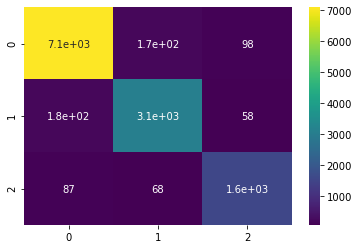

In [28]:
sns.heatmap(confusion_matrix(y_test, pred), cmap='viridis', annot=True);

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7362
           1       0.93      0.93      0.93      3301
           2       0.91      0.91      0.91      1705

    accuracy                           0.95     12368
   macro avg       0.93      0.93      0.93     12368
weighted avg       0.95      0.95      0.95     12368

